# Trabajo Práctico N. ° 1: Análisis exploratorio de datos de TROCAFONE

Primero se cargarán los datos propuestos por la cátedra y se hará un análisis inicial del dataframe.


In [1]:
# importacion general de librerias 
# y de visualizacion (matplotlib y seaborn)
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

plt.style.use('default') # haciendo los graficos un poco mas bonitos en matplotlib
#plt.rcParams['figure.figsize'] = (20, 10)

sns.set(style="whitegrid") # seteando tipo de grid en seaborn

pd.options.display.float_format = '{:20,.2f}'.format # suprimimos la notacion cientifica en los outputs

import warnings
warnings.filterwarnings('ignore')

events = pd.read_csv('./data/events.csv')

pd.set_option('display.max_columns', 51)

In [2]:
# analizemos primero las dimensiones del data frame
events.shape

(1011288, 23)

In [3]:
# veamos la informacion general del dataframe con info()
events.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1011288 entries, 0 to 1011287
Data columns (total 23 columns):
timestamp                   1011288 non-null object
event                       1011288 non-null object
person                      1011288 non-null object
url                         82756 non-null object
sku                         563838 non-null object
model                       564284 non-null object
condition                   563836 non-null object
storage                     563836 non-null object
color                       563836 non-null object
skus                        221699 non-null object
search_term                 48967 non-null object
staticpage                  3598 non-null object
campaign_source             82796 non-null object
search_engine               50957 non-null object
channel                     87378 non-null object
new_vs_returning            87378 non-null object
city                        87378 non-null object
region                    

In [4]:
# Vemos los tipos de datos
events.dtypes

timestamp                   object
event                       object
person                      object
url                         object
sku                         object
model                       object
condition                   object
storage                     object
color                       object
skus                        object
search_term                 object
staticpage                  object
campaign_source             object
search_engine               object
channel                     object
new_vs_returning            object
city                        object
region                      object
country                     object
device_type                 object
screen_resolution           object
operating_system_version    object
browser_version             object
dtype: object

Como se puede observar pandas al levantar los datos de TROCAFONE interpreta todos como object, incluso los timestamps. Tendremos que trabajar sobre los datos si queremos otro tipo de datos.

A continuación se explica a qué corresponde cada columna según el enunciado:

* **timestamp**: Fecha y hora cuando ocurrió el evento. (considerar BRT/ART).
* **event**: Tipo de evento
* **person**: Identificador de cliente que realizó el evento.
* **url**: Url visitada por el usuario.
* **sku**: Identificador de producto relacionado al evento.
* **model**: Nombre descriptivo del producto incluyendo marca y modelo.
* **condition**: Condición de venta del producto
* **storage**: Cantidad de almacenamiento del producto.
* **color**: Color del producto
* **skus**: Identificadores de productos visualizados en el evento.
* **search_term**: Términos de búsqueda utilizados en el evento.
* **staticpage**: Identificador de página estática visitada
* **campaign_source**: Origen de campaña, si el tráfico se originó de una campaña de marketing
* **search_engine**: Motor de búsqueda desde donde se originó el evento, si aplica.
* **channel**: Tipo de canal desde donde se originó el evento.
* **new_vs_returning**: Indicador de si el evento fue generado por un usuario nuevo (New) o por un usuario que previamente había visitado el sitio (Returning) según el motor de analytics.
* **city**: Ciudad desde donde se originó el evento
* **region**: Región desde donde se originó el evento.
* **country**: País desde donde se originó el evento.
* **device_type**: Tipo de dispositivo desde donde se genero el evento.
* **screen_resolution**: Resolución de pantalla que se está utilizando en el dispositivo desde donde se genero el evento.
* **operating_system_version**: Version de sistema operativo desde donde se origino el evento.
* **browser_version**: Versión del browser utilizado en el evento 


### Análisis de las categorías de eventos que pueden ocurrir
Para comenzar a orientar el análisis veremos que tipos de eventos ocurren en trocafone y qué cantidad de éstos ocurrió de cada uno.

In [5]:
events_types = events['event']
events_counts = events_types.value_counts()

Realizamos un gráfico de barras para observar estos datos:

Text(0,0.5,'Ocurrencias')

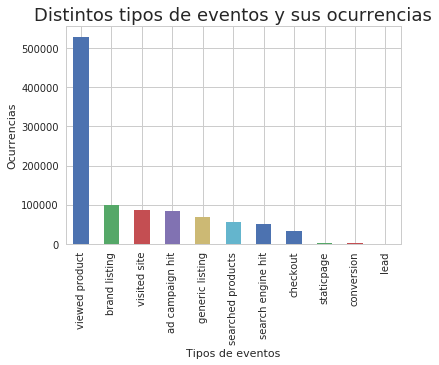

In [6]:
plot_events_counts = events_counts.plot.bar()
plot_events_counts.set_title("Distintos tipos de eventos y sus ocurrencias", fontsize=18)
plot_events_counts.set_xlabel("Tipos de eventos")
plot_events_counts.set_ylabel("Ocurrencias")

### Transformación de object a timestamp
Para poder trabajar con las fechas y hacer un análisis en base a esto debemos transformar los object a tipo de dato fecha.


In [7]:
events['timestamp'] = pd.to_datetime(events['timestamp'])
# Vemos los tipos de datos
events.dtypes

timestamp                   datetime64[ns]
event                               object
person                              object
url                                 object
sku                                 object
model                               object
condition                           object
storage                             object
color                               object
skus                                object
search_term                         object
staticpage                          object
campaign_source                     object
search_engine                       object
channel                             object
new_vs_returning                    object
city                                object
region                              object
country                             object
device_type                         object
screen_resolution                   object
operating_system_version            object
browser_version                     object
dtype: obje

Agregamos las columnas de año y mes

In [8]:
events['year'] = events['timestamp'].dt.year
events['month'] = events['timestamp'].dt.month

In [9]:
# Vemos de cuantos anios y meses tenemos datos
print(events['month'].value_counts())
print(events['year'].value_counts())

5    474949
6    281882
4    130008
3     77293
2     27886
1     19270
Name: month, dtype: int64
2018    1011288
Name: year, dtype: int64


Como podemos observar tenemos solo datos del año 2018 desde enero hasta junio.

In [10]:
# Vemos los distintos valores de country
events['country'].value_counts()

Brazil                84308
Unknown                2313
United States           465
Argentina                94
Canada                   35
France                   13
Netherlands              13
United Kingdom           12
Mozambique               12
Japan                    11
Poland                    9
French Guiana             8
Italy                     7
Portugal                  7
Romania                   7
Russia                    6
Guadeloupe                6
Dominican Republic        6
Germany                   5
Colombia                  4
Paraguay                  4
Bangladesh                4
Switzerland               3
Morocco                   2
India                     2
Angola                    2
Zimbabwe                  1
Turkey                    1
Denmark                   1
Uzbekistan                1
Ireland                   1
Sri Lanka                 1
Rwanda                    1
South Africa              1
China                     1
Belize              

In [11]:
# Vemos los distintos valores de region
events['region'].value_counts()

Sao Paulo                           24996
Unknown                             14772
Minas Gerais                         7755
Rio de Janeiro                       6913
Bahia                                5737
Pernambuco                           2962
Ceara                                2829
Parana                               2602
Rio Grande do Sul                    2576
Federal District                     1739
Goias                                1564
Santa Catarina                       1511
Para                                 1382
Maranhao                             1303
Espirito Santo                       1257
Rio Grande do Norte                  1064
Paraíba                               875
Piaui                                 824
Alagoas                               751
Mato Grosso do Sul                    618
Amazonas                              600
Tocantins                             596
Mato Grosso                           487
Sergipe                           

In [12]:
# Canales donde se originan los eventos

# paid: anuncios pagos
# direct: 
events['channel'].value_counts()

Paid        44193
Direct      18522
Organic     12348
Referral    11384
Social        846
Email          76
Unknown         9
Name: channel, dtype: int64

## Filtrados

Realizaremos una serie de filtraciones para ver la correlación entre los tipos de eventos.

In [27]:
channel_paid = events.loc[ events['channel'] == 'Paid' , : ]
events['month'].min()

1

Vemos los distintos tipos de dispositivos que generan eventos.

In [21]:
events['device_type'].value_counts()

Smartphone    44239
Computer      41790
Tablet         1234
Unknown         115
Name: device_type, dtype: int64

In [42]:
events['operating_system_version'].value_counts()

Windows 7             19675
Windows 10            17110
Android 7              9964
Android 6.0.1          7805
Android 6              6871
Android 5.1.1          4123
Android 7.1.1          3325
Windows 8.1            2781
Android 5.0.2          1640
Android 4.4.2          1402
iOS 11.3               1345
Android 4.4.4          1288
Android 5.1            1269
Android 8               973
Android 5.0.1           746
iOS 10.3.3              738
Windows 8               732
Windows XP              613
Android 4.2.2           566
Android 4.1.2           519
Android 5               321
Android 4.3             318
Linux                   293
iOS 11.2.6              286
iOS 9.3.5               268
Windows Phone 10        252
iOS 11.4                231
Windows Phone 8.1       200
iOS 11.2.5              147
Android 7.1.2           141
                      ...  
Mac OS X 10.12.3          2
Chrome OS 10176.66        2
Android 3.1               2
Ubuntu 10.4               2
iOS 11.0.1          

In [43]:
events['screen_resolution'].value_counts()

360x640      30009
1366x768     21379
320x534       3622
1920x1080     3521
320x570       2561
1360x768      2476
1600x900      2435
1024x768      2362
1440x900      2210
1280x1024     1914
320x568       1780
1280x720      1139
1280x800      1102
1536x864      1057
412x732        934
375x667        931
424x753        744
320x480        600
320x569        551
600x1024       432
1680x1050      373
1280x768       343
1024x600       317
768x1024       316
414x736        231
640x360        227
480x800        215
1093x615       208
360x740        203
320x427        163
             ...  
1024x864         1
1600x1024        1
396x704          1
1160x653         1
648x366          1
290x327          1
360x670          1
1440x960         1
421x748          1
1843x1037        1
1440x821         1
1813x1024        1
360x598          1
1280x672         1
1958x1101        1
1024x756         1
1136x642         1
800x450          1
240x260          1
1012x569         1
2021x1137        1
800x444     